In [1]:
import jpype
jpype.startJVM(jpype.getDefaultJVMPath())

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import pickle
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import scipy
from nxcals.api.extraction.data.builders import *

import matplotlib
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

In [9]:
start = datetime.strptime("2022-11-27 15:00", "%Y-%m-%d %H:%M")
end = start + timedelta(hours = 3)

print(f"start: {start}")
print(f"end: {end}")

df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PR.BMEAS-B-ST/Samples").build().toPandas()

start: 2022-11-27 15:00:00
end: 2022-11-27 18:00:00


In [11]:
df.keys()

Index(['__record_timestamp__', '__record_version__', 'acqStamp',
       'basicPeriodMilliSecond', 'beamDestinationName', 'class',
       'cycleDuration', 'cyclePosition', 'cycleTimeStamp', 'cycleUserName',
       'cyclestamp', 'device', 'firstSampleTime', 'firstSampleTime_units',
       'hotSpotsNames', 'hotSpotsSamples', 'hotSpotsSamples_units',
       'hotSpotsTimes', 'hotSpotsTimes_units', 'particleName', 'property',
       'samples', 'samples_units', 'samplingStates', 'samplingTrain',
       'samplingTrain_units', 'selector', 'superCycleDuration',
       'timeUnitFactor', 'nxcals_entity_id'],
      dtype='object')

In [21]:
df.iloc[0]

__record_timestamp__                                    1669563000700000000
__record_version__                                                        0
acqStamp                                                1669563003098238525
basicPeriodMilliSecond                                                  NaN
beamDestinationName                                                    None
class                                                        XenericSampler
cycleDuration                                                           NaN
cyclePosition                                                           NaN
cycleTimeStamp                                                          NaN
cycleUserName                                                          None
cyclestamp                                              1669563000700000000
device                                                        PR.BMEAS-B-ST
firstSampleTime                                                         0.0
firstSampleT

Text(0.5, 0, 'Time [ms]')

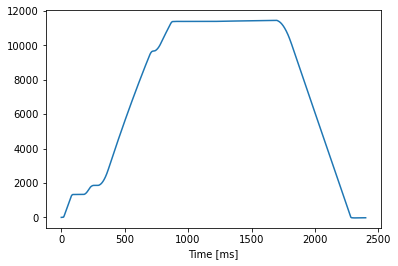

In [50]:
samples = df.iloc[0]["samples"]["elements"]
t = np.arange(0, len(samples)/10, 0.1)# time in ms
fig, ax = plt.subplots()
ax.plot(t, samples)
ax.set_xlabel("Time [ms]")

In [43]:
start = datetime.strptime("2022-11-27 15:00", "%Y-%m-%d %H:%M")
end = start + timedelta(hours = 3)

print(f"start: {start}")
print(f"end: {end}")

df = DevicePropertyDataQuery.builder(spark).system("CMW").startTime(start).endTime(end).entity().parameter("PE.SMH57.ACQUISITION").build().toPandas()

start: 2022-11-27 15:00:00
end: 2022-11-27 18:00:00


IllegalArgumentException: Illegal parameter name, expected <device>/<property> got PE.SMH57.ACQUISITION

In [ ]:
df